d:\Users\epiph\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
d:\Users\epiph\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
d:\Users\epiph\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


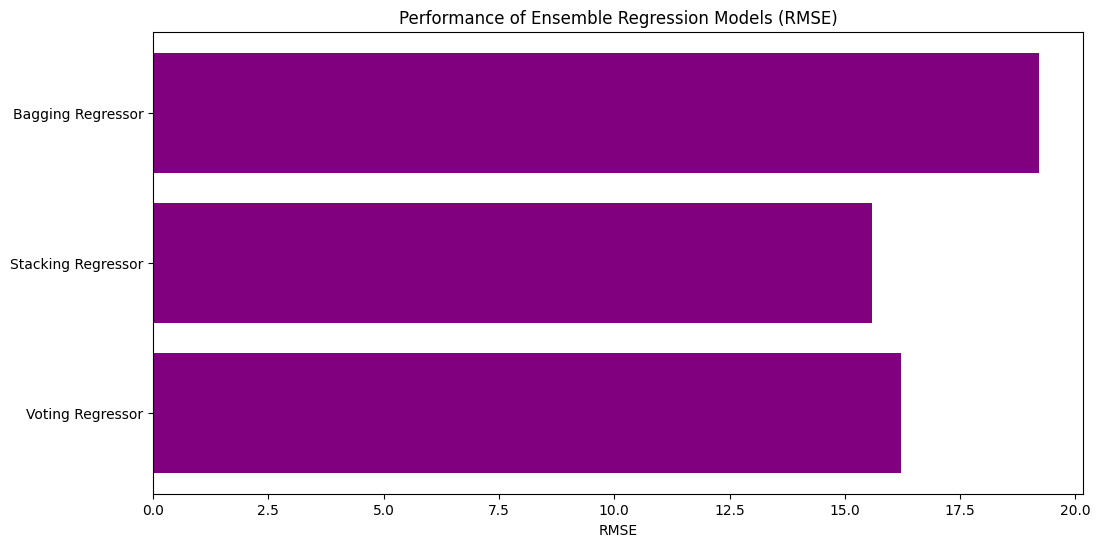

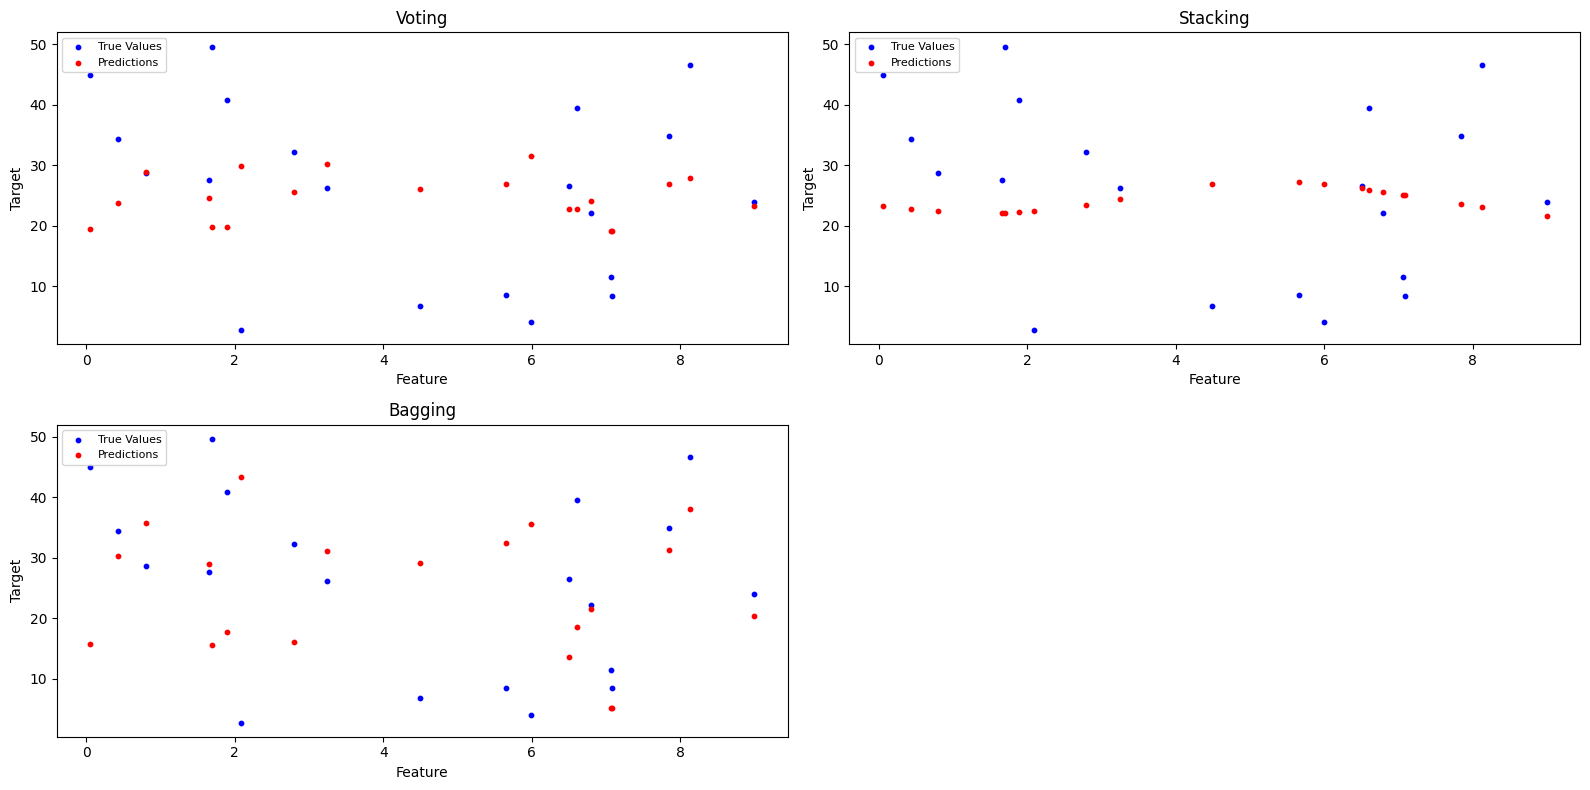

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import VotingRegressor, StackingRegressor, BaggingRegressor
from sklearn.linear_model import Ridge, LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

# Generate synthetic dataset
X, y = np.random.rand(100, 1) * 10, np.random.rand(100) * 50
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define base models
base_models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(alpha=1.0),
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "SVR": SVR(kernel='rbf', C=1.0, epsilon=0.1),
}

# 1. Voting Regressor
voting_regressor = VotingRegressor(estimators=list(base_models.items()))
voting_regressor.fit(X_train, y_train.ravel())
y_pred_voting = voting_regressor.predict(X_test)
rmse_voting = mean_squared_error(y_test, y_pred_voting, squared=False)

# 2. Stacking Regressor
stacking_regressor = StackingRegressor(
    estimators=list(base_models.items()),
    final_estimator=LinearRegression()  # Final meta-model
)
stacking_regressor.fit(X_train, y_train.ravel())
y_pred_stacking = stacking_regressor.predict(X_test)
rmse_stacking = mean_squared_error(y_test, y_pred_stacking, squared=False)

# 3. Bagging Regressor
bagging_regressor = BaggingRegressor(
    # base_estimator=DecisionTreeRegressor(random_state=42),
    n_estimators=10,
    random_state=42
)
bagging_regressor.fit(X_train, y_train.ravel())
y_pred_bagging = bagging_regressor.predict(X_test)
rmse_bagging = mean_squared_error(y_test, y_pred_bagging, squared=False)

# Results visualization
results = {
    "Voting Regressor": rmse_voting,
    "Stacking Regressor": rmse_stacking,
    "Bagging Regressor": rmse_bagging,
}

plt.figure(figsize=(12, 6))
plt.barh(list(results.keys()), list(results.values()), color='purple')
plt.xlabel("RMSE")
plt.title("Performance of Ensemble Regression Models (RMSE)")
plt.show()

# Visualize Predictions vs. True Values
plt.figure(figsize=(16, 8))
for i, (name, y_pred) in enumerate({
    "Voting": y_pred_voting,
    "Stacking": y_pred_stacking,
    "Bagging": y_pred_bagging,
}.items()):
    plt.subplot(2, 2, i + 1)
    plt.scatter(X_test, y_test, color='blue', label='True Values', s=10)
    plt.scatter(X_test, y_pred, color='red', label='Predictions', s=10)
    plt.title(name)
    plt.legend(loc="upper left", fontsize=8)
    plt.xlabel("Feature")
    plt.ylabel("Target")

plt.tight_layout()
plt.show()


以下是关于混合回归模型 (Ensemble Regression Models) 的详细实现，包括 **Voting Regressor**、**Stacking Regressor** 和 **Bagging Regressor**。

---

### **1. Voting Regressor**
- **特点**:
  - 将多个模型的预测值进行加权平均。
  - 常用于多个强回归器的组合。
- **适用场景**:
  - 不确定单一模型是否最优，通过组合模型提升性能。

---

### **2. Stacking Regressor**
- **特点**:
  - 使用基础模型的预测结果作为新特征，训练次级模型进行最终预测。
  - 次级模型（如线性回归）综合多个基础模型的预测结果。
- **适用场景**:
  - 基础模型之间的性能存在差异，但可以互补。

---

### **3. Bagging Regressor**
- **特点**:
  - 对训练集进行多次随机采样（有放回），每个采样训练一个回归模型。
  - 最终通过模型的预测平均值输出。
- **适用场景**:
  - 适合高方差模型，如决策树。

---

### **模型选型建议**

#### **Voting Regressor**
- **优点**: 简单，易于实现。
- **缺点**: 如果基础模型性能较差，组合效果可能不佳。
- **适用场景**: 当多个强回归器表现接近时。

#### **Stacking Regressor**
- **优点**: 通过次级模型提高预测性能。
- **缺点**: 训练时间较长，复杂度较高。
- **适用场景**: 不同模型的预测结果可以互补。

#### **Bagging Regressor**
- **优点**: 降低高方差模型的过拟合风险。
- **缺点**: 对高偏差模型无效。
- **适用场景**: 决策树类模型或高方差模型。

---

### **扩展说明**
1. 可以增加更多基础模型（如 XGBoost、LightGBM 等）来进一步提升性能。
2. 参数优化（如 `n_estimators`、`base_estimator` 等）可以进一步改善模型效果。
